# Temperature Forecast Project

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [135]:
#Importing the data
df=pd.read_csv('temperature.csv')

In [136]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [137]:
pd.set_option('display.max_columns',None) # to view all the columns

In [138]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [139]:
#Checking the shape of the dataset
df.shape

(7752, 25)

We have 7752 rows and 25 columns.

In [140]:
#Cheking column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Independent variables:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9


Dependent Variables:
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [141]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [142]:
#Converting date column to datetime type as it was of object type 
df['Date']=pd.to_datetime(df['Date'])

In [143]:
#Checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Station and date column have 2 null values.

Present_Tmax and Present_Tmin have 70 null values each.

LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 have 75 null values each.

Target variables have 27 null values each.


In [144]:
#dropping the rows which are having null values in date column as we can't assume a date
df.dropna(subset=['Date'],inplace=True)

In [145]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Looks like station and date were have null values in the same rows. 

In [146]:
#Checking mean, standard deviation and medain of the data
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7680.000000,7680.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7723.000000,7723.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,0.356047,0.318359,0.299142,0.589061,0.482312,0.276208,0.267307,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837
std,7.211568,2.966947,2.409233,14.656200,7.183861,2.942632,2.342243,2.177080,33.679766,0.262369,0.257968,0.250253,0.254241,1.928044,1.746438,1.148292,1.191776,0.050335,0.079406,54.256953,1.369833,428.996445,3.123441,2.483181
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963839,84.223911,27.673670,22.089794,5.679220,37.272626,0.146673,0.140623,0.101466,0.081575,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.189583,93.743027,31.709230,25.152881,8.031527,84.222851,0.575126,0.558551,0.496700,0.499459,0.052499,0.018340,0.007893,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


As their is no huge difference between mean and medain and the standard deviation is also low therefore we will replace the null values with the mean of the particular columns.

In [147]:
#replacing null values with mean of that particular column
for i in df.columns:
    df[i]=df[i].fillna(df[i].mean())

In [148]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Visualization:

In [149]:
df.station.nunique()

25

There are total 25 weather stations.

In [150]:
df.station.value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

Every station have 310 observations. Observations are evenly distributed at each station.

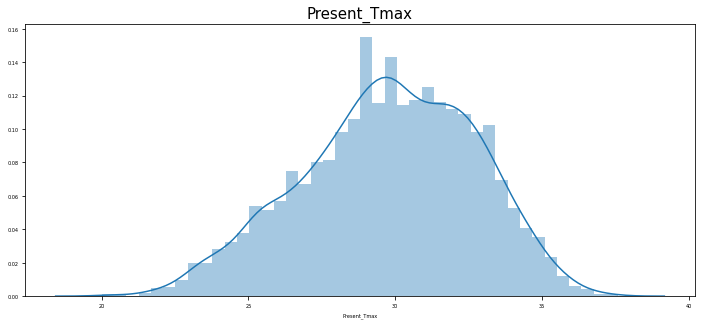

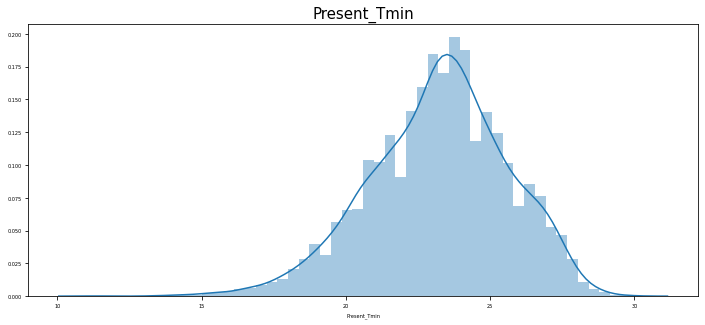

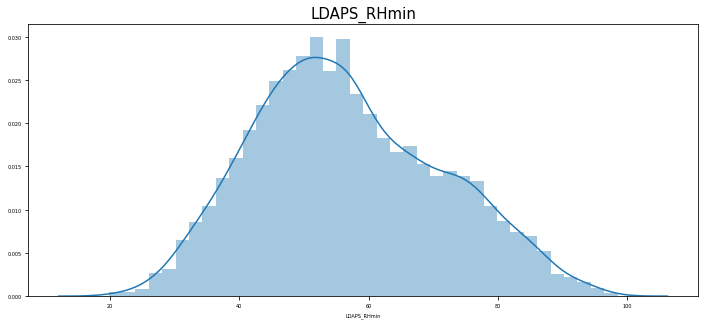

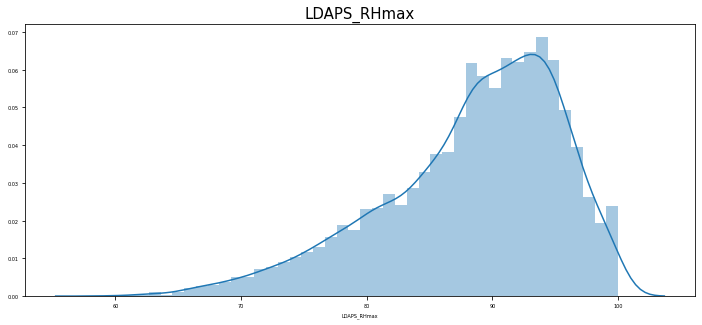

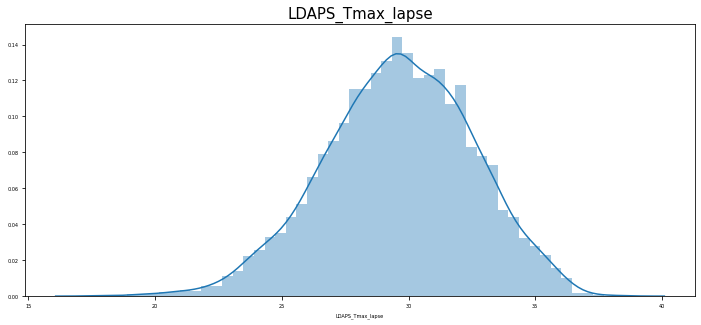

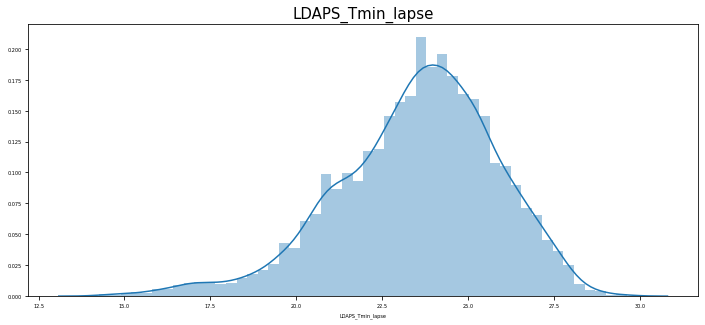

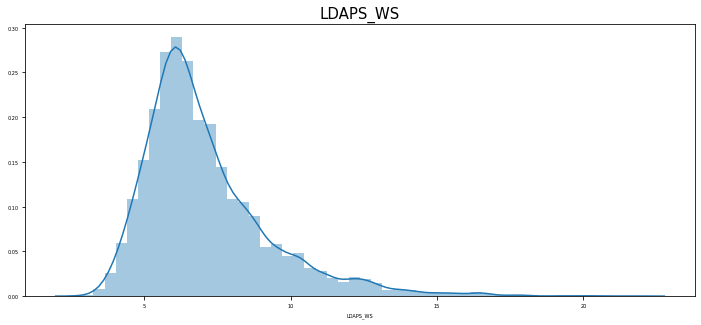

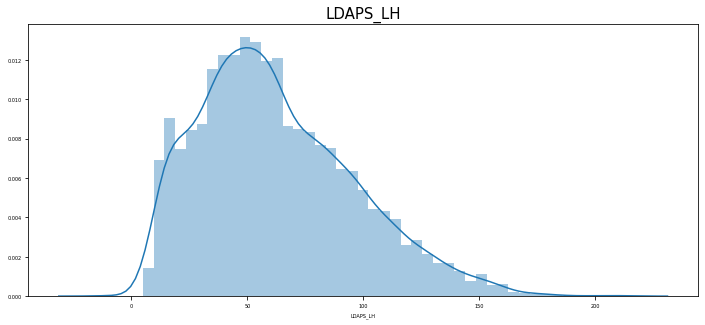

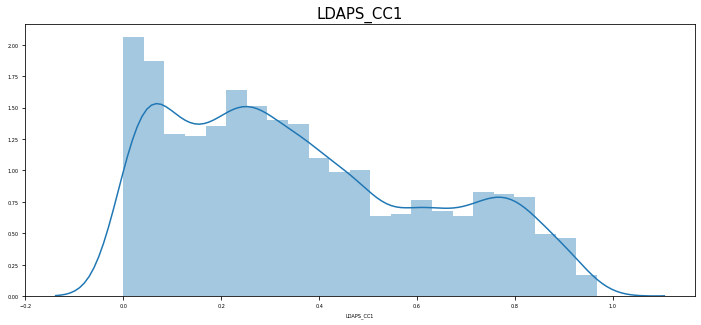

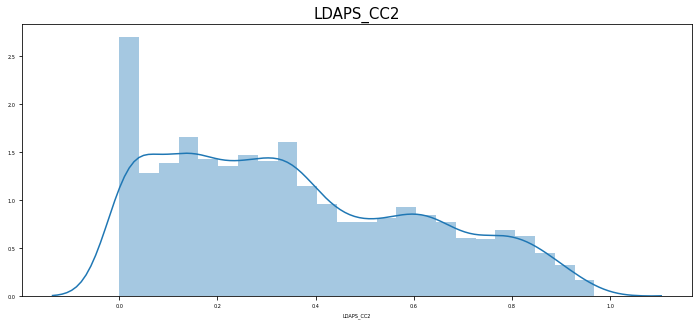

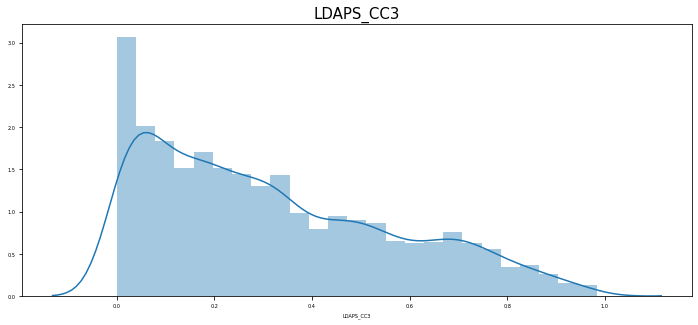

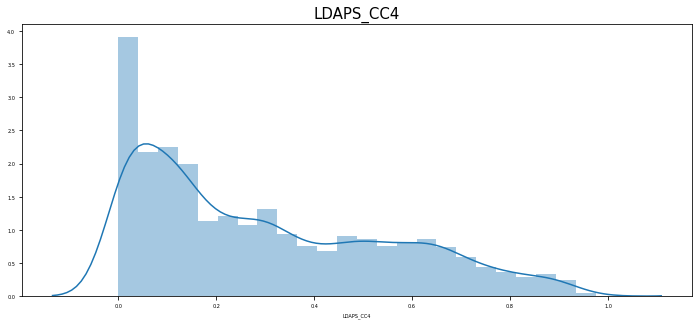

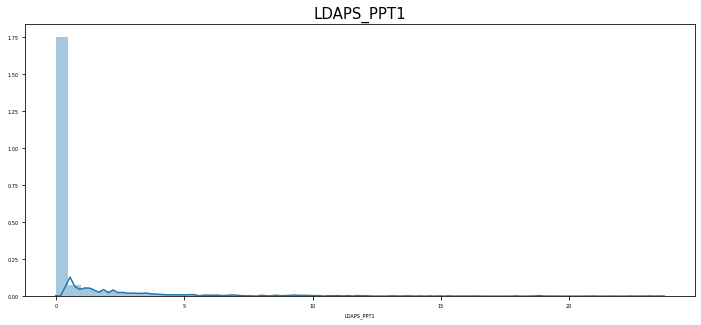

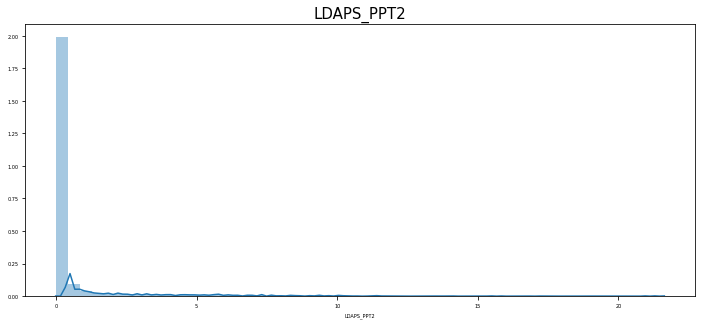

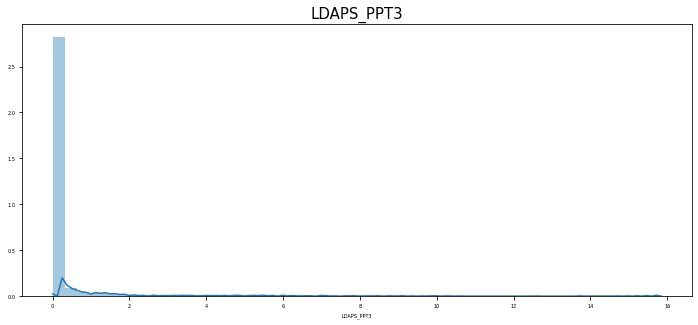

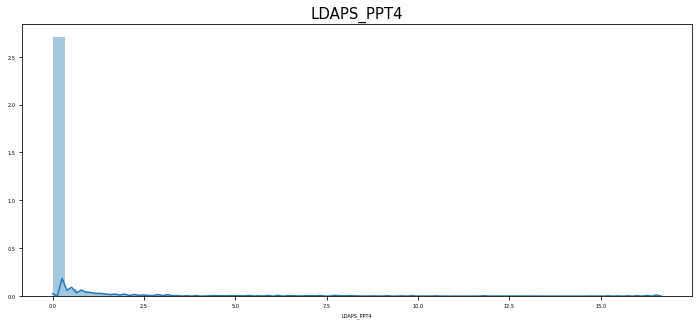

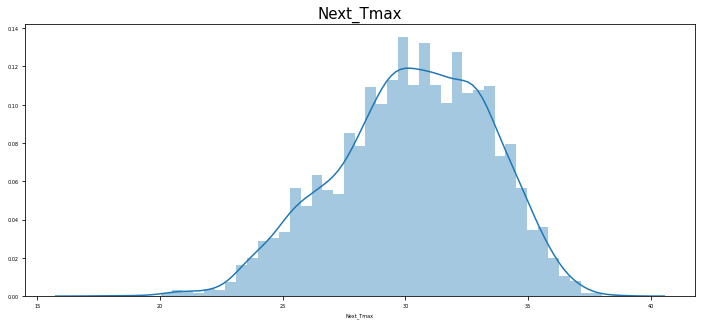

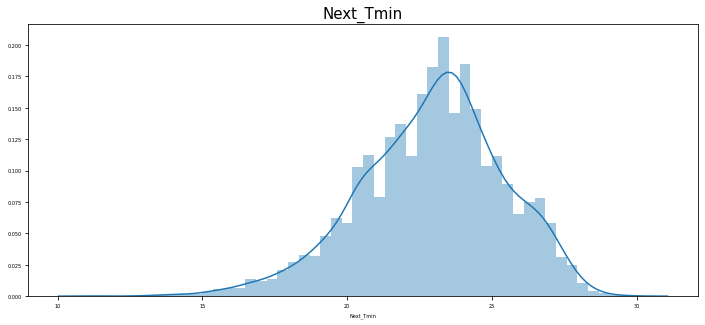

In [151]:
col=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin']

for i in col:
    plt.figure(figsize=(12,5))
    sns.distplot(df[i])
    plt.title(i,fontsize=15)
    plt.show()

Observations:

Present_Tmax, Present_Tmin and LDAPS_RHmin have nearly uniform distribution.

LDAPS_RHmax is right skewed.

LDAPS_Tmax_lapse and LDAPS_Tmin_lapse have uniform distribution.

LDAPS_WS is left skewed.

LDAPS_LH is slightly left skewed.

LDAPS_CC1, LDAPS_CC2, LDAPS_CC3 and LDAPS_CC4 are left skewed.

LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 have most of the values near to 0.

Next_Tmax and Next_Tmin have uniform distribution.

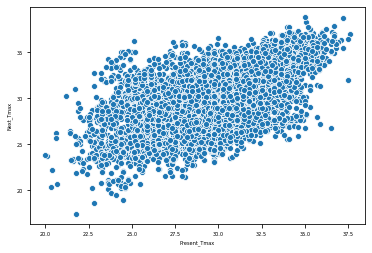

In [152]:
sns.scatterplot(df['Present_Tmax'],df['Next_Tmax'])
plt.show()

Present_Tmax and Next_Tmax have positive linear relaiton.

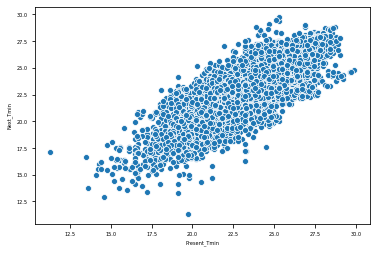

In [153]:
sns.scatterplot(df['Present_Tmin'],df['Next_Tmin'])
plt.show()

Present_Tmin and Next_Tmin have positive linear relaiton.

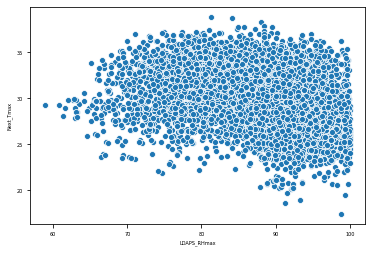

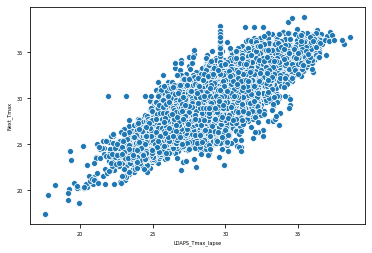

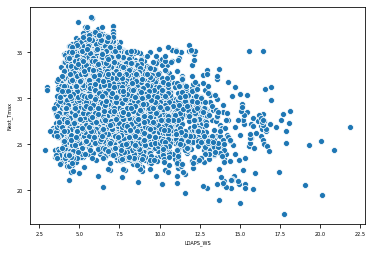

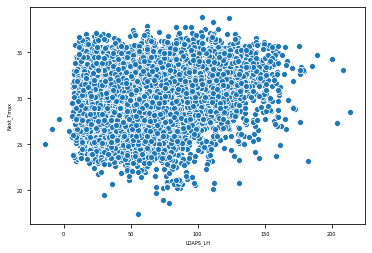

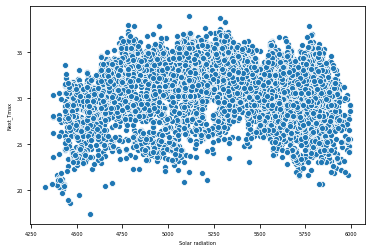

In [154]:
col=['LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_WS','LDAPS_LH','Solar radiation']
for i in col:
    sns.scatterplot(df[i],df['Next_Tmax'])
    plt.show()

LDAPS_Tmax_lapse have positive linear relation with Next_Tmax. 

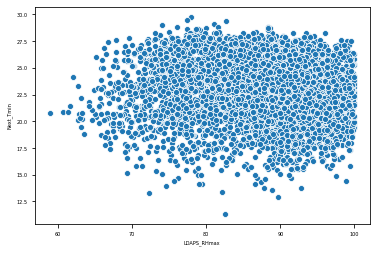

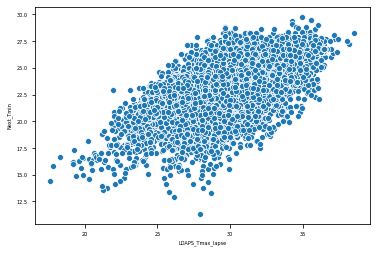

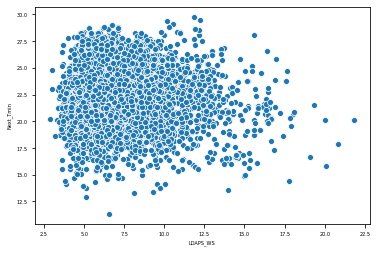

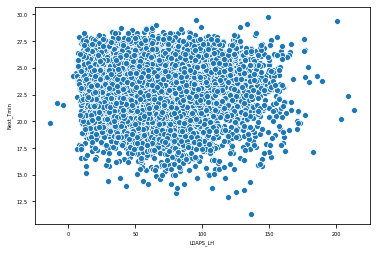

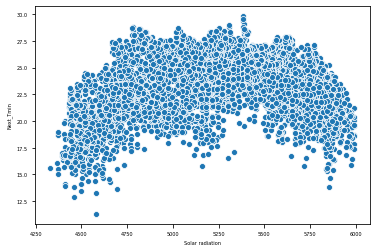

In [155]:
for i in col:
    sns.scatterplot(df[i],df['Next_Tmin'])
    plt.show()

LDAPS_Tmax_lapse have positive linear relation with Next_Tmin. 

In [156]:
#Data description
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,0.356047,0.318359,0.299142,0.589061,0.482312,0.276208,0.267307,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,0.256717,0.249039,0.253007,1.918691,1.737965,1.142722,1.185994,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,0.142424,0.103113,0.082777,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,0.554910,0.493971,0.497218,0.067515,0.024224,0.009685,0.000686,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


Observations:

Average Present Tmax is 29.7 °C.

Average Present Tmin is 23.2 °C.

Average LDAPS Tmax lapse is 29.6 °C.

Average LDAPS Tmin lapse is 23.5 °C.

Majority of LDAPS PPTS value is 0%.

The standard deviation is low in most of the columns which means data is not much deviated.

There is no much difference in mean and median of the respective columns.

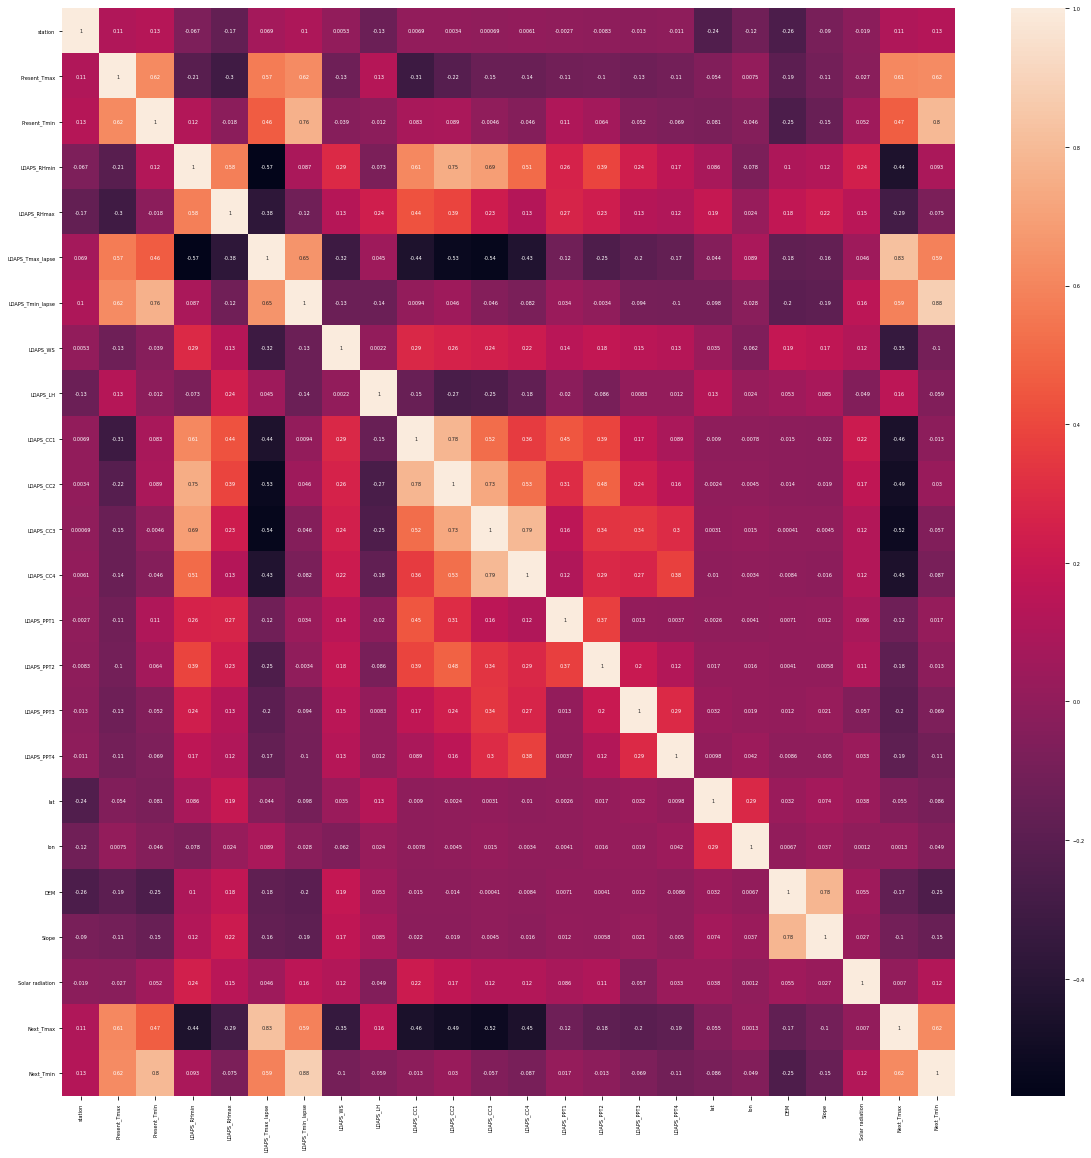

In [158]:
#Checking correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [160]:
corr=df.corr()
corr['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.826630
Next_Tmin           0.620119
Present_Tmax        0.609320
LDAPS_Tmin_lapse    0.585728
Present_Tmin        0.469903
LDAPS_LH            0.155305
station             0.108154
Solar radiation     0.007014
lon                 0.001303
lat                -0.055268
Slope              -0.104421
LDAPS_PPT1         -0.124598
DEM                -0.174384
LDAPS_PPT2         -0.184874
LDAPS_PPT4         -0.186269
LDAPS_PPT3         -0.201779
LDAPS_RHmax        -0.287320
LDAPS_WS           -0.347861
LDAPS_RHmin        -0.441382
LDAPS_CC4          -0.448861
LDAPS_CC1          -0.455046
LDAPS_CC2          -0.493371
LDAPS_CC3          -0.517429
Name: Next_Tmax, dtype: float64

Next Tmax have strong correlation with LDAPS_Tmax_lapse, Next_Tmin and Present_Tmax.

In [161]:
corr['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.879809
Present_Tmin        0.795860
Present_Tmax        0.621706
Next_Tmax           0.620119
LDAPS_Tmax_lapse    0.585411
station             0.128539
Solar radiation     0.118531
LDAPS_RHmin         0.092732
LDAPS_CC2           0.029632
LDAPS_PPT1          0.017057
LDAPS_PPT2         -0.012680
LDAPS_CC1          -0.012730
lon                -0.048623
LDAPS_CC3          -0.056592
LDAPS_LH           -0.058624
LDAPS_PPT3         -0.068521
LDAPS_RHmax        -0.075298
lat                -0.085509
LDAPS_CC4          -0.086975
LDAPS_WS           -0.100693
LDAPS_PPT4         -0.110245
Slope              -0.148784
DEM                -0.249059
Name: Next_Tmin, dtype: float64

Next Tmin have strong correlation with LDAPS_Tmin_lapse, Present_Tmin, Next_Tmin and Present_Tmax.

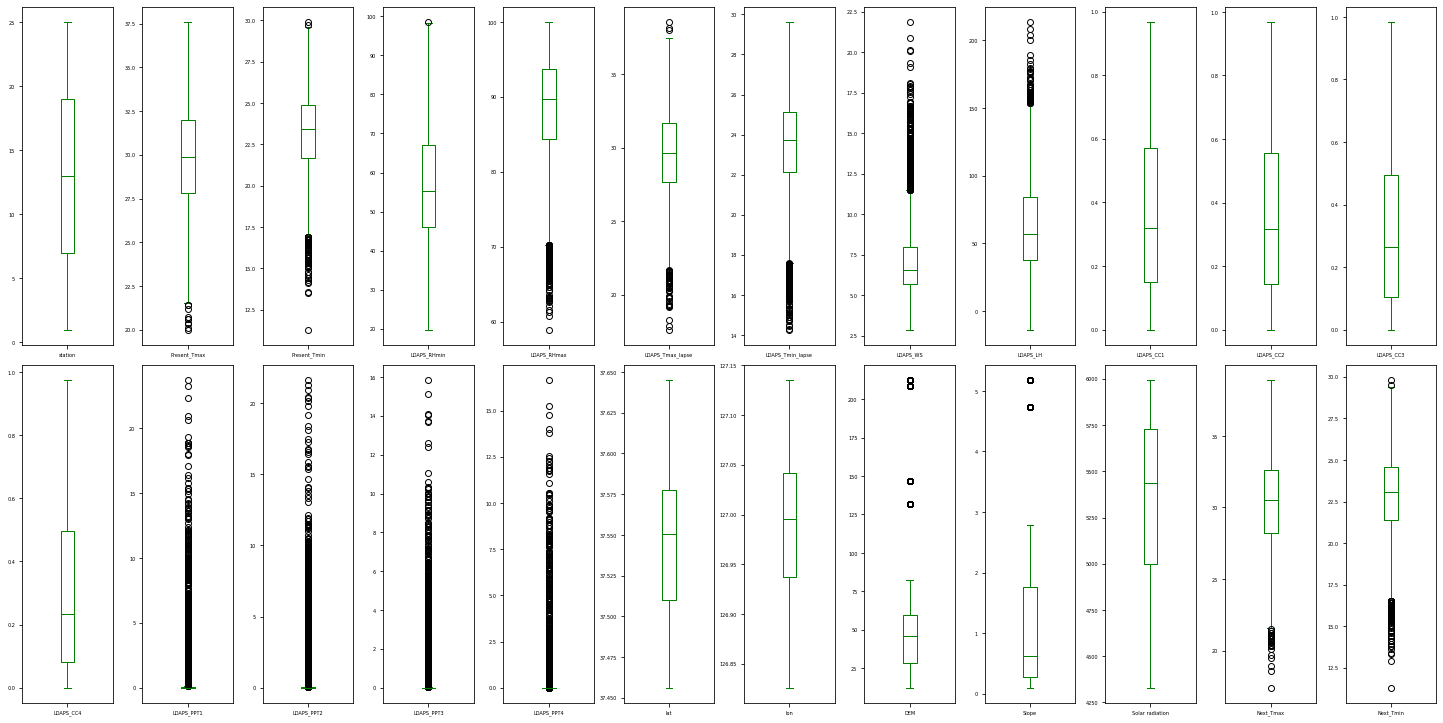

In [162]:
#Checking outliers
df.plot(kind='box',subplots=True,layout=(2,12),figsize=(20,10),color='green')
plt.tight_layout()

We can see a huge number of outliers. In PPTs columns most of the values are 0 there for a lage number of outliers can be seen.

In [165]:
#Removing date column as we need to predcit the next day temperature based on the present day data therefore date in not needed.
df.drop(['Date'],axis=1,inplace=True)

In [166]:
#Checking outlers using zscore
from scipy.stats import zscore
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [168]:
print('shape before removing the outliers:' , df.shape)
df_new=df[(zscr<3).all(axis=1)]
print('shape after removing outliers :', df_new.shape)

shape before removing the outliers: (7750, 24)
shape after removing outliers : (6888, 24)


In [170]:
print('Data loss =', 100-(6888/7750)*100)

Data loss = 11.122580645161293


As data loss is more after removing the ouliers we will keep them.

In [173]:
#Seperating independetn and target variables
x=df.iloc[:,0:-2]
y_Tmax=df.iloc[:,-2]
y_Tmin=df.iloc[:,-1]

In [174]:
x.shape,y_Tmax.shape,y_Tmin.shape

((7750, 22), (7750,), (7750,))

In [175]:
#Applying min-max scler to bring the variables to a standard scale
from sklearn.preprocessing import MinMaxScaler
col_name=x.columns.values
sc=MinMaxScaler(feature_range = (0,1))
sc.fit(x)
x=pd.DataFrame(sc.transform(x))
x.columns=col_name

In [176]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,0.000000,0.494318,0.543011,0.488518,0.783659,0.499546,0.569132,0.207447,0.365853,0.241862,0.210559,0.164361,0.134325,0.0,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.528870,1.000000
1,0.041667,0.676136,0.553763,0.412406,0.771200,0.584480,0.636121,0.148053,0.288703,0.233137,0.260000,0.162071,0.131041,0.0,0.0,0.0,0.0,0.786017,0.666667,0.161990,0.081816,0.925703
2,0.083333,0.659091,0.645161,0.367024,0.609716,0.595982,0.670697,0.171575,0.150545,0.216426,0.265884,0.207455,0.145813,0.0,0.0,0.0,0.0,0.643008,0.750809,0.104702,0.032994,0.922242
3,0.125000,0.681818,0.650538,0.488316,0.914366,0.577497,0.589934,0.145848,0.349446,0.223692,0.233388,0.163813,0.137732,0.0,0.0,0.0,0.0,1.000000,0.634304,0.166759,0.479615,0.918280
4,0.166667,0.647727,0.569892,0.462078,0.760251,0.549257,0.600379,0.150325,0.535505,0.156529,0.258165,0.181840,0.174432,0.0,0.0,0.0,0.0,0.500530,1.000000,0.113360,0.080123,0.919835


# Training ML models for Next_Tmax

Finding the best random state:

In [177]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr=LinearRegression()
ls=Lasso()
rd=Ridge()

In [179]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y_Tmax,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.760669527929223
At random state 0 Testing accuracy is: 0.7952739922883323


At random state 1 Training accuracy is: 0.7648493416310433
At random state 1 Testing accuracy is: 0.7790197140482941


At random state 2 Training accuracy is: 0.7690578557074271
At random state 2 Testing accuracy is: 0.7612904297463808


At random state 3 Training accuracy is: 0.7683692332742034
At random state 3 Testing accuracy is: 0.7642944683888035


At random state 4 Training accuracy is: 0.7654934217412517
At random state 4 Testing accuracy is: 0.7750630590029828


At random state 5 Training accuracy is: 0.7685574810607889
At random state 5 Testing accuracy is: 0.7634743907871568


At random state 6 Training accuracy is: 0.771637000109253
At random state 6 Testing accuracy is: 0.7502959083275431


At random state 7 Training accuracy is: 0.7691265962160765
At random state 7 Testing accuracy is: 0.7613555909706575


At random state 8 Training accuracy is: 0.77528499

Getting best results at random state 81.

In [180]:
#Doing train test split at random state 81
x_train,x_test,y_train,y_test=train_test_split(x,y_Tmax,test_size=.20,random_state=81)

In [181]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6200, 22), (1550, 22), (6200,), (1550,))

In [182]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [183]:
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [185]:
model=[lr,ls,rd,svr,knn,rf,ada]

for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    scores=cross_val_score(i, x, y_Tmax, cv=5)
    print('Cross Validation Score:',scores.mean())



LinearRegression()
score: 0.7681848335598424
mean absolute error: 1.1451332974812112
Root mean squared error: 1.5127162778351542
r2_score: 0.7650740623835391
Cross Validation Score: 0.7016909703879995


Lasso()
score: 0.0
mean absolute error: 2.527239330437631
Root mean squared error: 3.12211888289098
r2_score: -0.0007253015921868666
Cross Validation Score: -0.04043491792682867


Ridge()
score: 0.7680230668328546
mean absolute error: 1.1438500033638652
Root mean squared error: 1.512121941957805
r2_score: 0.7652586277067979
Cross Validation Score: 0.7023149551518443


SVR()
score: 0.822993506888037
mean absolute error: 0.9901013373340423
Root mean squared error: 1.3416252060993197
r2_score: 0.8152100165461398
Cross Validation Score: 0.6970959599187664


KNeighborsRegressor()
score: 0.8425102829464319
mean absolute error: 1.1508803632217133
Root mean squared error: 1.5038707818158161
r2_score: 0.7678134536289944
Cross Validation Score: 0.5379595676651944


RandomForestRegressor()
score

Getting best results with SVR with trainig score of 82%, testing score of 81%, cross validaton score of 69%, MAE- 0.99 and RMSE- 1.34.

# Hyper parameter tuning:

In [190]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel': ['rbf', 'poly', 'sigmoid']}
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'poly'}


In [192]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_svr)))
print('R2 score is:',r2_score(y_test,pred_svr))
cv_score=cross_val_score(svr,x,y_Tmax,cv=5)
cv_mean=cv_score.mean()
print('Cross Val Score is:',cv_mean)

mean absolute error: 0.9753509705591469
Root mean squared error: 1.3256267928486476
R2 score is: 0.8195908522747637
Cross Val Score is: 0.6653655764320175


MAE is decreased to 0.97 from 0.99, RSME is reduced to 1.32 from 1.34 , r2 score is increased from 81.5% to 81.9% and cross val score is 66%.

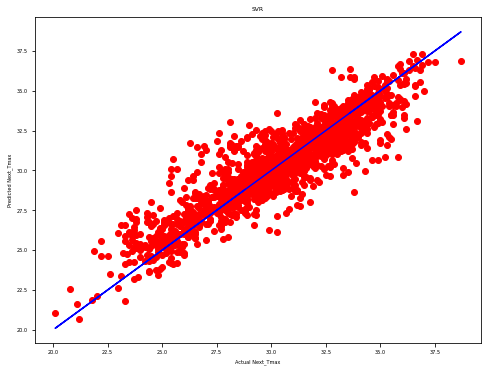

In [193]:
#ploting our model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_svr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('SVR')
plt.show()

The above graph shows that our model is performing good.

In [194]:
#Saving our model
import joblib
joblib.dump(svr,'Next_Tmax_prediction_svr.obj')

['Next_Tmax_prediction_svr.obj']

# Training ML models for Next_Tmin

Finding the best random state:

In [195]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y_Tmin,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.8273238614418411
At random state 0 Testing accuracy is: 0.8370730669552913


At random state 1 Training accuracy is: 0.8281844905969628
At random state 1 Testing accuracy is: 0.8347725819109791


At random state 2 Training accuracy is: 0.8293920921952278
At random state 2 Testing accuracy is: 0.8294698579896413


At random state 3 Training accuracy is: 0.8258440602821907
At random state 3 Testing accuracy is: 0.8429381058979477


At random state 4 Training accuracy is: 0.8287171223454236
At random state 4 Testing accuracy is: 0.8320638925468393


At random state 5 Training accuracy is: 0.8281105858902119
At random state 5 Testing accuracy is: 0.8346915173115723


At random state 6 Training accuracy is: 0.8316123518725934
At random state 6 Testing accuracy is: 0.8204314649210078


At random state 7 Training accuracy is: 0.8278440933581094
At random state 7 Testing accuracy is: 0.8355454559711714


At random state 8 Training accuracy is: 0.831495

Getting best results at random state 67.

In [200]:
#Doing train test split at random state 67
x_train,x_test,y_train,y_test=train_test_split(x,y_Tmin,test_size=.20,random_state=67)

In [201]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6200, 22), (1550, 22), (6200,), (1550,))

In [202]:
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [203]:
model=[lr,ls,rd,svr,knn,rf,ada]
for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    scores=cross_val_score(i, x, y_Tmin, cv=5)
    print('Cross Validation Score:',scores.mean())



LinearRegression()
score: 0.8298534584702596
mean absolute error: 0.7877911627442339
Root mean squared error: 1.01961174018382
r2_score: 0.8278552798242526
Cross Validation Score: 0.7754910208496446


Lasso()
score: 0.0
mean absolute error: 1.9397764072907893
Root mean squared error: 2.458253697556769
r2_score: -0.000639066273767197
Cross Validation Score: -0.16330172319220354


Ridge()
score: 0.8297942290737245
mean absolute error: 0.7881608375223503
Root mean squared error: 1.0194463573696453
r2_score: 0.8279111196468479
Cross Validation Score: 0.7759970363034306


SVR()
score: 0.88218828527817
mean absolute error: 0.6747767705318763
Root mean squared error: 0.9010163352006553
r2_score: 0.8655721101154683
Cross Validation Score: 0.7804381984626692


KNeighborsRegressor()
score: 0.8693702203732194
mean absolute error: 0.8388304277545496
Root mean squared error: 1.1107482422206445
r2_score: 0.7957061366073975
Cross Validation Score: 0.5830256549316672


RandomForestRegressor()
score:

Here also SVR model is performing good with least difference in training and testing score. We have atained a training score of 88%, testing score of 86%, cross validation score of 78%, MAE- 0.67 and RMSE- 0.90.

# Hyper parameter tuning:

In [204]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel': ['rbf', 'poly', 'sigmoid']}
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'rbf'}


In [205]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_svr)))
print('R2 score is:',r2_score(y_test,pred_svr))
cv_score=cross_val_score(svr,x,y_Tmin,cv=5)
cv_mean=cv_score.mean()
print('Cross Val Score is:',cv_mean)

mean absolute error: 0.6747767705318763
Root mean squared error: 0.9010163352006553
R2 score is: 0.8655721101154683
Cross Val Score is: 0.7804381984626692


Our final results remains the same with MAE- 0.67, RMSE- 0.90, r2 score of 86% and cross val score of 78%.

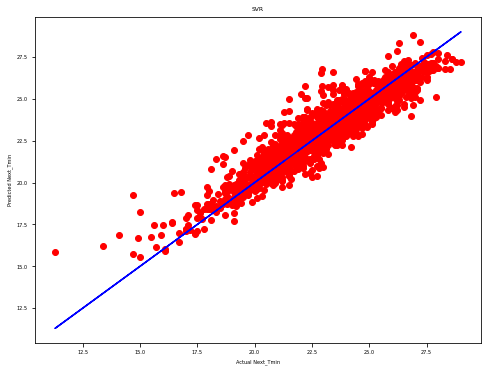

In [206]:
#ploting our model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_svr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Next_Tmin')
plt.ylabel('Predicted Next_Tmin')
plt.title('SVR')
plt.show()

Our model is performing good.

In [207]:
#Saving our model
import joblib
joblib.dump(svr,'Next_Tmin_prediction_svr.obj')

['Next_Tmin_prediction_svr.obj']